# Lighthouse - Desafio de Ciência de Dados

**Autor**: Antonio Duarte Marcos Junior

# 1. Análise exploratória

## 1.1 Importação de bibliotecas e pacotes necessários

In [1]:
import pandas  as pd
import numpy   as np
import seaborn as sns
import matplotlib.pyplot as plt

## 1.2 Leitura dos dados

In [2]:
df = pd.read_csv('./dados/cars_train.csv',
                 sep='\t', 
                 encoding='utf-16')

## 1.3 Tratamento de dados

### 1.3.1 Remoção de colunas desnecessárias

Algumas colunas contém informações que não serão úteis para a solução do problema. 
São elas.

* `id`: Se trata de identificadores únicos que não fornecem informação útil para o problema.
* `veiculo_alienado`: Como exibido a seguir todos os valores desta coluna são nulos.
* `elegivel_revisao`: Como exibido a seguir todos os valores desta coluna são nulos.


Por isso, tais colunas serão inicialmente removidas do dataset.

In [3]:
n_null = df['veiculo_alienado'].isna().sum() # Contagem de valores nulos na coluna veiculo_alienado
n_registers = len(df) # total de registros no dataset

print(f'Na coluna `veiculo_alienado` há um total de {n_null} valores nulos de um total de {n_registers} registros no dataset.')

Na coluna `veiculo_alienado` há um total de 29584 valores nulos de um total de 29584 registros no dataset.


In [4]:
n_null = len(df) - df['elegivel_revisao'].sum() # Contagem de valores nulos na coluna veiculo_alienado

print(f'Na coluna `elegivel_revisao` há um total de {n_null} valores nulos de um total de {n_registers} registros no dataset.')

Na coluna `elegivel_revisao` há um total de 29584 valores nulos de um total de 29584 registros no dataset.


In [5]:
df.drop(columns=['id', 'veiculo_alienado', 'elegivel_revisao'], inplace=True)

### 1.3.2 Substituição de valores NaN

O comando `info` a seguir exibe quais colunas têm valores nulos.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29584 entries, 0 to 29583
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   num_fotos                29407 non-null  float64
 1   marca                    29584 non-null  object 
 2   modelo                   29584 non-null  object 
 3   versao                   29584 non-null  object 
 4   ano_de_fabricacao        29584 non-null  int64  
 5   ano_modelo               29584 non-null  float64
 6   hodometro                29584 non-null  float64
 7   cambio                   29584 non-null  object 
 8   num_portas               29584 non-null  int64  
 9   tipo                     29584 non-null  object 
 10  blindado                 29584 non-null  object 
 11  cor                      29584 non-null  object 
 12  tipo_vendedor            29584 non-null  object 
 13  cidade_vendedor          29584 non-null  object 
 14  estado_vendedor       

Regras de substituição adotados:

* `num_fotos`: Considerou-se que se não há quantidade informada de fotos então o valor substitudo deve ser zero.
* `dono_aceita_troca`: Os valores foram substituídos por [0, 1]. 1 - Dono aceita troca; 0 - Dono não aceita troca.
* `veiculo_único_dono`: Os valores foram substituídos por [0, 1]. 1 - Único dono; 0 - Não é de um único dono.
* `revisoes_concessionaria`: Os valores foram substituídos por [0, 1]. 1 - Todas as revisões em concessionária; 0 - Nem todas as revisões feitas em concessionária.
* `ipva_pago`: Os valores foram substituídos por [0, 1]. 1 - IPVA pago; 0 - IPVA não está pago.
* `garantia_de_fábrica`: Os valores foram substituídos por [0, 1]. 1 - Dentro da garantia; 0 - Fora da garantia.
* `revisoes_dentro_agenda`: Os valores foram substituídos por [0, 1]. 1 - Revisões dentro da agenda; 0 - Revisões fora da agenda.

In [7]:
# Subsitituição de valores NaN de acordo com as regras apresentadas
df['num_fotos'].fillna(0, inplace=True)
df['dono_aceita_troca'].replace([np.NaN, 'Aceita troca'], [0, 1], inplace=True)
df['veiculo_único_dono'].replace([np.NaN, 'Único dono'], [0, 1], inplace=True)
df['revisoes_concessionaria'].replace([np.NaN, 'Todas as revisões feitas pela concessionária'], [0, 1], inplace=True)
df['veiculo_licenciado'].replace([np.NaN, 'Licenciado'], [0, 1], inplace=True)
df['ipva_pago'].replace([np.NaN, 'IPVA pago'], [0, 1], inplace=True)
df['garantia_de_fábrica'].replace([np.nan, 'Garantia de fábrica'], [0,1], inplace=True)
df['revisoes_dentro_agenda'].replace([np.nan, 'Todas as revisões feitas pela agenda do carro'], [0,1], inplace=True)


### 1.3.3 Padronização de variáveis categóricas.

Nas variáveis de apenas duas categorias os valores foram substituídos por [0, 1].

Regras adotadas:
* `bindado`: 0 - N, 1 - S
* `elegivel_revisao`: 1 - Elegivel revisão; 0 - Revisão não elegível
* `troca`: 1 - Se troca; 0 - Não troca
* `entrega_delivery`: 1 - Se entrega delivery; 0 - Se não entrega delivery

In [8]:
df['blindado'].replace(['N', 'S'], [0, 1], inplace=True)
df['troca'] = [1 if troca else 0 for troca in df['troca']]
df['entrega_delivery'] = [1 if entrega else 0 for entrega in df['entrega_delivery']]

### 1.3.4 Extração de caraterísticas

Na coluna `versao` existem informações que serão úteis para a solução do problemas a saber.
* `motor`: tipo de motor do veículo.
* `combustível`: tipo de combustível do veículo.
* `tracao_4x4`: Se o veículo têm ou não tração 4x4.

#### Extração do tipo de motor do veículo.

In [9]:
df['motor'] = df['versao'].str.split(' ').str[0]
df['motor'].unique()

array(['1.6', '2.0', '2.4', '1.0', '1.5', '2.7', '1.8', '1.2', '1.4',
       '3.0', '3.2', '3.5', '1.3', '4.4', '2.2', '2.8', '2.3', '2.5',
       '2.1', '4.2', '3.8', '3.6', 'EV', '6.7', 'B12P', '3.3', '5.0',
       '6.2', '2.9', '4.0', '1.9', '3.7', '1.7', '4.8', '4.9', 'P8',
       'Z.E.', '0.6', '4S', 'ELÉTRICO', '5.5', '4.1', '3.9', '90', '4.3',
       '4.6', '5.2', '5.7', '4.5', 'TURBO', 'BEV', '4.7', '5.9'],
      dtype=object)

In [10]:
df.query('motor in ["EV", "B12P", "P8", "Z.E.", "4S", "ELÉTRICO", "TURBO", "BEV"]')

,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,tipo,...,troca,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,preco,motor
325,8.0,CHEVROLET,BOLT,EV 60 ELÉTRICO,2020,2021.0,24069.0,Automática,4,Utilitário esportivo,...,0,0,1,1,1,1,1,1,255152.443907,EV
396,17.0,NISSAN,LEAF,B12P 40 ELÉTRICO,2020,2020.0,28686.0,Automática,4,Picape,...,0,1,1,1,1,1,1,0,270079.012211,B12P
469,8.0,NISSAN,LEAF,B12P 40 ELÉTRICO,2020,2020.0,36344.0,Automática,4,Picape,...,0,1,1,0,1,1,1,0,159078.990809,B12P
837,14.0,NISSAN,LEAF,B12P 40 ELÉTRICO,2020,2021.0,8553.0,Automática,4,Picape,...,0,1,0,0,1,1,0,0,223566.354929,B12P
1454,13.0,NISSAN,LEAF,B12P 40 ELÉTRICO,2020,2021.0,15727.0,Automática,4,Hatchback,...,0,1,1,0,1,1,0,0,189930.782877,B12P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27579,17.0,PORSCHE,TAYCAN,4S ELÉTRICO,2020,2021.0,13843.0,Automática,4,Sedã,...,0,1,0,0,0,0,0,0,288810.348523,4S
28112,16.0,NISSAN,LEAF,B12P 40 ELÉTRICO,2020,2020.0,11920.0,Automática,4,Hatchback,...,0,1,0,0,1,1,0,0,226002.411725,B12P
28350,9.0,NISSAN,LEAF,B12P 40 ELÉTRICO,2020,2020.0,31259.0,Automática,4,Picape,...,0,1,1,1,1,1,1,0,206679.805564,B12P
28913,8.0,PORSCHE,TAYCAN,4S ELÉTRICO,2021,2021.0,16452.0,Automática,4,Sedã,...,0,1,0,0,1,0,1,0,318637.440500,4S


Na listagem acima os seguintes termos reverem-se a motores elétricos:
* EV, B12P, P8, Z.E., 4S, ELETRICO, TURBO, BEV 

Assim todas estas denominações serão substituídas por elétrico.

In [11]:
df['motor'].replace(["EV", "B12P", "P8", "Z.E.", "4S", "TURBO", "BEV", "ELÉTRICO"], "elétrico", inplace=True)

#### Extração do tipo de combustível do veículo.

No dataset é informado se o veículo é flex, elétrico ou a diesel. A informação se o veículo é a gasolina pode ser informada ou não. Assim, será assumido que, quando nenhuma das três opções listadas aparecer na versão do veículo ele é movido a gasolina apenas.

In [12]:
combustiveis = []

for versao in df['versao']:
    versao = versao.lower()
    if versao.find('flex') != -1:
        combustiveis.append('flex')
    elif versao.find('diesel') != -1:
        combustiveis.append('diesel')
    elif versao.find('elétrico') != -1:
        combustiveis.append('elétrico')
    else:
        combustiveis.append('gasolina')

df['combustivel'] = combustiveis

#### Extração da tração do veículo.

In [13]:
df['tracao_4x4'] = [1 if tracao else 0 for tracao in df['versao'].str.lower().str.find('4x4') != -1]

#### Extração da idade do veículo.

Outra informação que poderá ser útil para a modelagem é a idade do veículo. Para o cálculo da idade será considerado o ano de fabricação do mesmo. 

In [14]:
print('Ano de fabricação do modelo mais recente do dataset:', df['ano_de_fabricacao'].max())

Ano de fabricação do modelo mais recente do dataset: 2022


In [15]:
print('Menor quilometragem do modelo mais recente do dataset (km rodados):', df.query('ano_de_fabricacao == 2022')['hodometro'].min())

Menor quilometragem do modelo mais recente do dataset (km rodados): 100.0


Então, neste dataset, são todos carros usados. Pode-se pressumir que estes dados foram, possívelmente, coletados já em 2023. Então para o cálculo da idade do veículo será calculada a diferença entre o ano de 2023 e o ano de fabricação do mesmo.

In [16]:
df['idade'] = 2023 - df['ano_de_fabricacao']

In [17]:
df.head()

,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,tipo,...,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,preco,motor,combustivel,tracao_4x4,idade
0,8.0,NISSAN,KICKS,1.6 16V FLEXSTART SL 4P XTRONIC,2017,2017.0,67772.0,CVT,4,Sedã,...,1,1,1,0,0,74732.590084,1.6,flex,0,6
1,8.0,JEEP,COMPASS,2.0 16V FLEX LIMITED AUTOMÁTICO,2017,2017.0,62979.0,Automática,4,Sedã,...,0,1,0,0,0,81965.332634,2.0,flex,0,6
2,16.0,KIA,SORENTO,2.4 16V GASOLINA EX 7L AWD AUTOMÁTICO,2018,2019.0,44070.0,Automática,4,Sedã,...,0,0,0,0,0,162824.814472,2.4,gasolina,0,5
3,14.0,VOLKSWAGEN,AMAROK,2.0 HIGHLINE 4X4 CD 16V TURBO INTERCOOLER DIES...,2013,2015.0,85357.0,Automática,4,Picape,...,0,1,1,0,0,123681.358857,2.0,diesel,1,10
4,8.0,SSANGYONG,KORANDO,2.0 GLS 4X4 16V TURBO DIESEL 4P AUTOMÁTICO,2013,2015.0,71491.0,Automática,4,Utilitário esportivo,...,1,0,0,1,1,82419.763891,2.0,diesel,1,10


## 1.4 EDA

### 1.4.1 Distribuição dos preços

O objetivo desta análise é verificar como os dados são distribuídos. Se a distribuição aproxima-se de uma Normal, importante para alguns modelos de machine learning. Se há assimetria e outliers.

In [18]:
df['preco'].describe()

count    2.958400e+04
mean     1.330239e+05
std      8.166287e+04
min      9.869951e+03
25%      7.657177e+04
50%      1.143558e+05
75%      1.636796e+05
max      1.359813e+06
Name: preco, dtype: float64

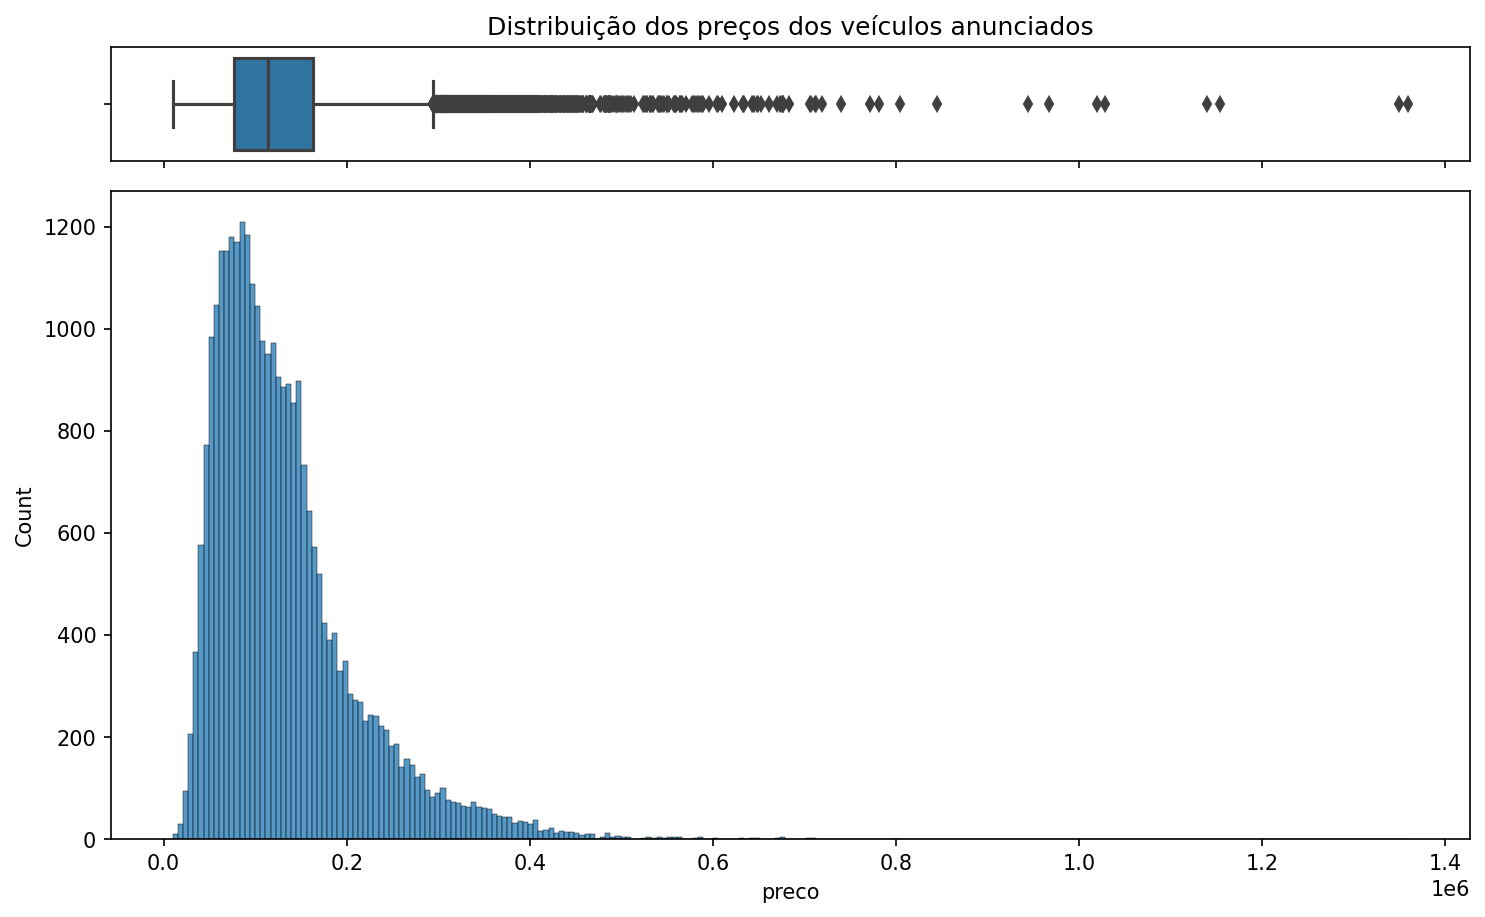

In [19]:
fig, axes = plt.subplots(2, 
                         figsize=(10, 6), 
                         dpi=150, 
                         sharex=True, 
                         gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(data=df, 
            x='preco', 
            ax=axes[0])
sns.histplot(data=df, 
             x='preco', 
             ax=axes[1])

axes[0].set_xlabel('')
fig.tight_layout()
axes[0].set_title('Distribuição dos preços dos veículos anunciados')
plt.show()

Os resultados mostram que os preços dos carros não são normalmente distribuído. Há assimetrica a esquerda o que significa que a média dos preços é maior que a mediana que é maior que a moda. A média do preço dos veículos anúnciados é de R$ 133.023,90. Os 50% centrais (valores entre o 1º e 3º quartis) variam entre R$ 76.517,77 e R$ 163.679.60 com mediana de R$ 114.355,80. Existem vários outliers que deverão ser tratados no momento da modelagem.

### 1.4.2 Relação entre preço e quilometragem.

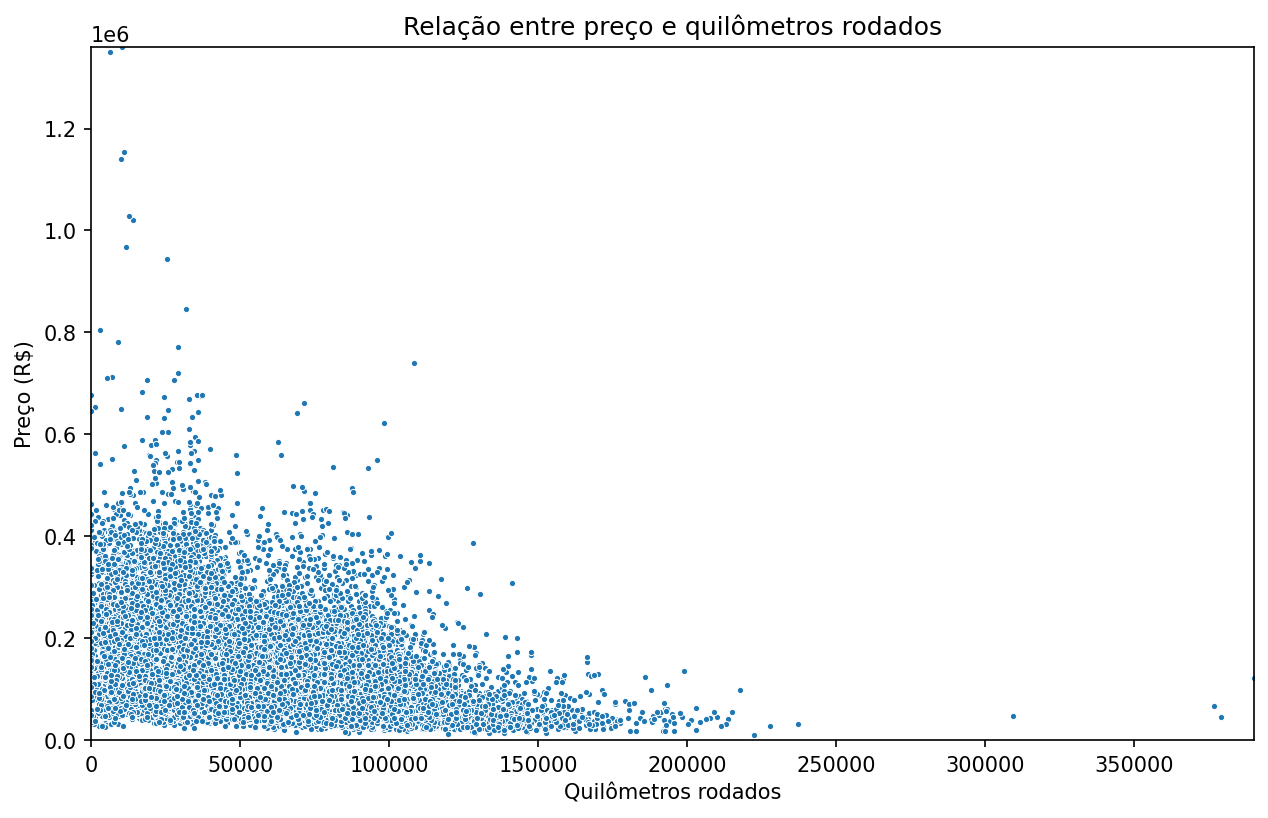

In [20]:
fig, ax = plt.subplots(1, 
                       figsize=(10, 6), 
                       dpi=150)

sns.scatterplot(data=df, 
                y='preco', 
                x='hodometro', 
                ax=ax, 
                marker='.')
ax.set_title('Relação entre preço e quilômetros rodados')
ax.set_ylim(0, df.preco.max())
ax.set_xlim(0, df.hodometro.max())
ax.set_ylabel('Preço (R$)')
ax.set_xlabel('Quilômetros rodados')
plt.show()

Não há uma relação linear clara entre Preço e Quilômetros rodados. Porém, identifica-se uma "barreira" na qual veículos com certa quilômetragem tendêm a terem preços limitados em um certo valor. Por exemplo, veículo com aproximadamente 100.000 km rodados tendem a ter preço abaixo abaixo dos R$ 400.000 e veículos acima de 150.000 km tendem a ter preços abaixo de R$ 200.000. Isto mostra, que há a relação entre km rodados e preço do veículo.

### 1.4.3 Distribuição de preços entre variáveis categóricas.

Algumas variáveis categóricas só teram interesse para o modelo de regressão de preços caso haja diferença significativa entre a distribuição dos preços.
A análise visual será focada em algums que têm mais de uma categoria. Mas todas irão passar por um teste estatístico para verificar se há diferença estatísticamente significante.

#### Distribuição dos tipos de câmbio

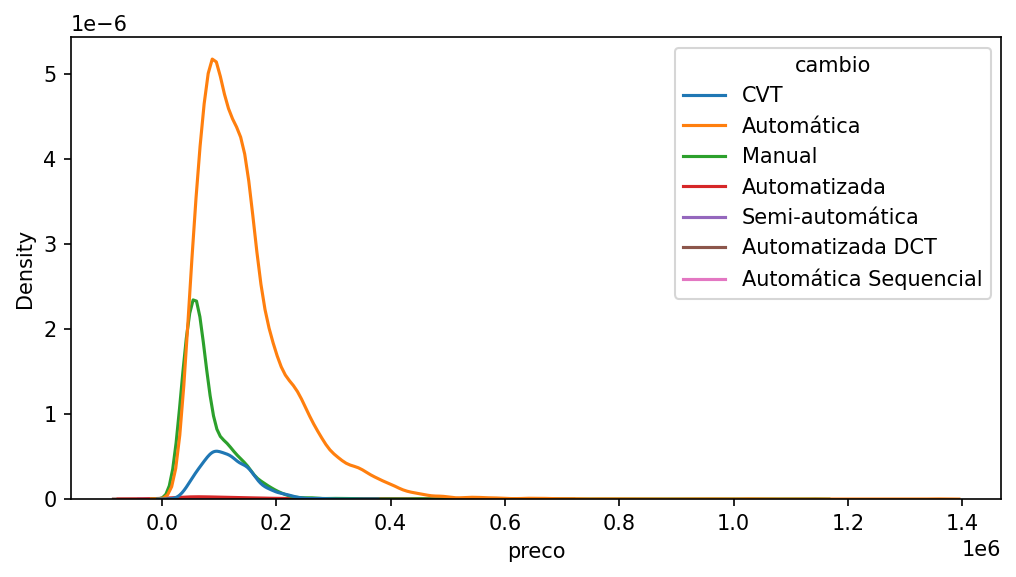

In [21]:
fig, ax = plt.subplots(1, 
                       figsize=(8, 4), 
                       dpi=150)

sns.kdeplot(data=df, 
            x='preco', 
            hue='cambio', 
            ax=ax)
plt.show()

In [22]:
df['cambio'].value_counts(normalize=True)

Automática               0.762067
Manual                   0.168638
CVT                      0.060573
Automatizada             0.004698
Automatizada DCT         0.001792
Semi-automática          0.001386
Automática Sequencial    0.000845
Name: cambio, dtype: float64

No gráfico é possível identificar apenas as curvas de distribuição dos câmbios: Automática, Manual e CVT. Para os demais a quantidade de exemplares não é significante para produzir uma análise visual. Verificando a porcentagem das categorias de câmbios vê-se que as demais categorias se somadas não representam nem 1% do total de amostras. 

Como na prática são todas denominações para câmbio automático, embora existam diferenças técnicas que justifiquem a diferença de preço. E para simplificar a modelagem serão adotadas apenas duas categorias de câmbio: Manual e Automático. Assim todas as categorias referentes a câmbios automáticos serão reclassificadas.

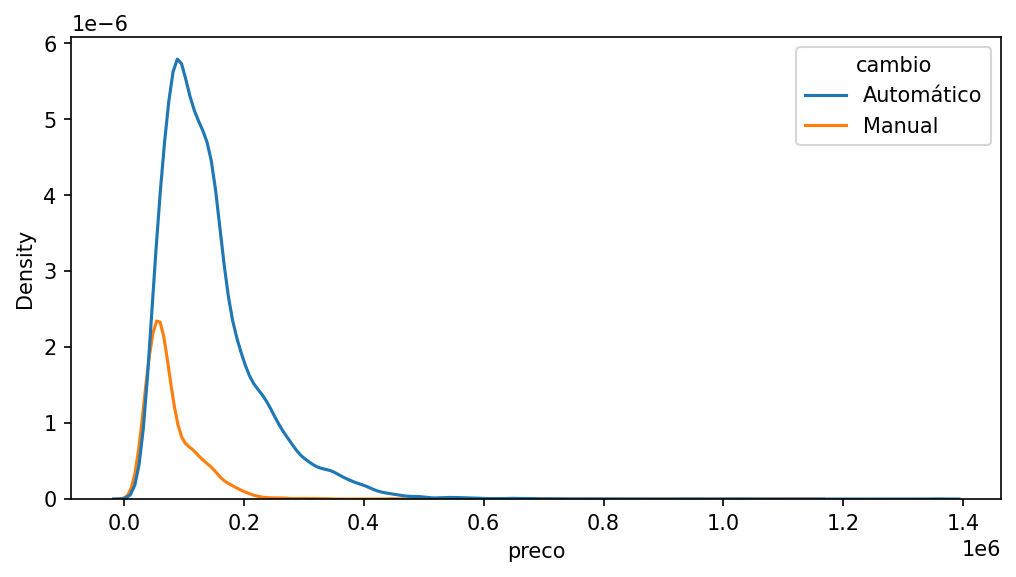

In [23]:
df['cambio'] = ['Manual' if manual else 'Automático' for manual in df['cambio'].str.lower().str.find('manual') != -1]
fig, ax = plt.subplots(1, 
                       figsize=(8, 4), 
                       dpi=150)

sns.kdeplot(data=df, 
            x='preco', 
            hue='cambio', 
            ax=ax)
plt.show()

As curvas mostram que há uma quantidade bem maior que câmbios automáticos que manuais. Os câmbios manuais tendem a ter menores preços que os automáticos.

### Distribuição por tipo de veículo

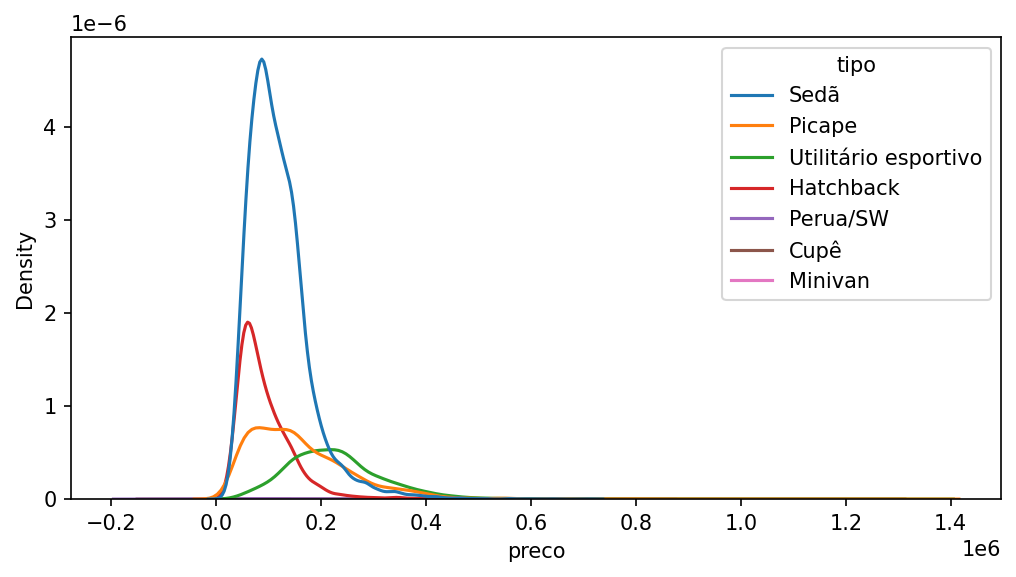

In [24]:
fig, ax = plt.subplots(1, 
                       figsize=(8, 4), 
                       dpi=150)

sns.kdeplot(data=df, 
            x='preco',
            hue='tipo',
            ax=ax)

plt.show()

In [25]:
df['tipo'].value_counts(normalize=True)

Sedã                    0.555334
Hatchback               0.166441
Picape                  0.163906
Utilitário esportivo    0.112290
Perua/SW                0.000913
Cupê                    0.000879
Minivan                 0.000237
Name: tipo, dtype: float64

Perua/SW, Cupê e Minivan são os tipos de veículos menos comuns no dataset. Todos os demais representam pelo menos 11% dos registros, caso dos utilitários esportivos. Os histogramas mostram que os Utilitários Esportivos e as Picapes tendem a apresentar maiores preços que os demais. Sedâ são os veículos mais populares no dataset e os Hatchback são os que apresentam distribuição com os menores preços.

### Número de portas

In [26]:
df['num_portas'].value_counts(normalize=True)

4    0.970018
2    0.029340
3    0.000642
Name: num_portas, dtype: float64

A célua acima mostra que 97% dos veículos do dataset são de quatro portas. Portanto esta informação não parece ser muito útil para precificar veículos neste dataset. Pois, a pequena quantidade de amostras com outros números de portas pode são ser significante para o modelo.

### Estado do vendedor

In [27]:
df['estado_vendedor'].value_counts(normalize=True)

São Paulo (SP)              0.553610
Rio de Janeiro (RJ)         0.086128
Paraná (PR)                 0.085384
Santa Catarina (SC)         0.077812
Minas Gerais (MG)           0.059999
Rio Grande do Sul (RS)      0.055638
Goiás (GO)                  0.026670
Bahia (BA)                  0.020416
Pernambuco (PE)             0.010749
Alagoas (AL)                0.004225
Paraíba (PB)                0.003651
Rio Grande do Norte (RN)    0.003042
Pará (PA)                   0.002501
Ceará (CE)                  0.002332
Amazonas (AM)               0.001724
Mato Grosso do Sul (MS)     0.001183
Mato Grosso (MT)            0.001115
Acre (AC)                   0.000980
Sergipe (SE)                0.000811
Espírito Santo (ES)         0.000710
Tocantins (TO)              0.000676
Maranhão (MA)               0.000237
Piauí (PI)                  0.000203
Rondônia (RO)               0.000135
Roraima (RR)                0.000068
Name: estado_vendedor, dtype: float64

Mais de 55% dos anúncios são para o estado de São Paulo e existem mais de 16 estados com menos de 1% dos anúncios.

### Marca do veículo

In [28]:
df['marca'].value_counts(normalize=True)

VOLKSWAGEN       0.155287
CHEVROLET        0.102082
TOYOTA           0.073688
HYUNDAI          0.069058
JEEP             0.067604
FIAT             0.064832
BMW              0.060303
AUDI             0.057396
PEUGEOT          0.056618
HONDA            0.053610
MERCEDES-BENZ    0.038027
FORD             0.035830
MITSUBISHI       0.029137
LAND ROVER       0.025690
RENAULT          0.018186
NISSAN           0.014805
KIA              0.013791
PORSCHE          0.011797
VOLVO            0.009701
CITROËN          0.006558
TROLLER          0.005983
RAM              0.005679
CHERY            0.005172
JAGUAR           0.005003
MINI             0.004631
LEXUS            0.002535
SUZUKI           0.001386
SUBARU           0.001386
DODGE            0.001251
CHRYSLER         0.001014
SSANGYONG        0.000473
SMART            0.000406
ALFA ROMEO       0.000304
LIFAN            0.000270
MASERATI         0.000237
JAC              0.000101
IVECO            0.000068
EFFA             0.000034
FERRARI     

Há boa distribuição entre as marcas dos veículos. As marcas que têm alguns dos modelos mais caros do dataset são também as de menor frequência. A informação da marca do veículo pode ser significativa para a definição do preço do produto.

### Teste de significância entre das distribuições

Será aplicado o teste de Kolmogorov Smirnov para verificar se há diferença estatísticas entre os preços das variáveis de apenas duas categorias.

O teste de Kolmogorov-Smirnov é um teste não paramétrica para verificar se duas amostras pertencem a mesma distribuição de probabilidade.

In [29]:
features = ['blindado', 
            'entrega_delivery', 
            'troca', 
            'dono_aceita_troca', 
            'veiculo_único_dono', 
            'revisoes_concessionaria',
            'ipva_pago', 
            'veiculo_licenciado', 
            'garantia_de_fábrica', 
            'revisoes_dentro_agenda',
            'tracao_4x4']

Será assumido o nível de significância de alpha=0.05.

O teste de Kolmogorov-Smirnov têm duas hípoteses.

H0 : Hipótese nula. As duas amostras pertencem à mesma distribuição de probabilidade.
H1 : Hipótese alternativa. As duas amostra não pertencem à mesma distribuição de probabilidade.

Quando o p-valor é menor que o nível de significância descarta-se a hipótese nula.

In [30]:
from scipy.stats import kstest

for feature in features:
    print('kstest para a variável:', feature)
    negativos = df[df[feature] == 0]['preco']
    positivos = df[df[feature] == 1]['preco']
    stat, pvalue = kstest(negativos, positivos)
    print('pvalor = ', pvalue)
    if pvalue <= 0.05:
        print('Descarte hipótese nula: As séries não são igualmente distribuídas.')
    else:
        print('Aceitar hipótese nula: As séries são igualmente distribuídas.')
    
    print('='*40)

kstest para a variável: blindado
pvalor =  2.2604203695383952e-20
Descarte hipótese nula: As séries não são igualmente distribuídas.
kstest para a variável: entrega_delivery
pvalor =  7.391613194125548e-39
Descarte hipótese nula: As séries não são igualmente distribuídas.
kstest para a variável: troca
pvalor =  6.222993391955844e-32
Descarte hipótese nula: As séries não são igualmente distribuídas.
kstest para a variável: dono_aceita_troca
pvalor =  2.710387846389543e-29
Descarte hipótese nula: As séries não são igualmente distribuídas.
kstest para a variável: veiculo_único_dono
pvalor =  2.1470452458555272e-100
Descarte hipótese nula: As séries não são igualmente distribuídas.
kstest para a variável: revisoes_concessionaria
pvalor =  1.2281006656025746e-173
Descarte hipótese nula: As séries não são igualmente distribuídas.
kstest para a variável: ipva_pago
pvalor =  2.177628757890612e-13
Descarte hipótese nula: As séries não são igualmente distribuídas.
kstest para a variável: veiculo

Portanto todas as variáveis testadas têm informação potencialmente útil para diferenciar os preços, pois, apresentam diferença significante entre os preços.

#### Exportação dos dados

Exportação dos dados transformados para as próxima etapa do desafio.

In [31]:
df.to_csv('./dados/cars_train_v2.csv', index=False)

A etapa seguinte está no arquivo `02_hipoteses_negocio.ipynb`.